# Testing

Notebook for developing and testing the package. 

In [1]:
import sys
sys.path.append('../')
sys.path.append('../../uhecr_model/stan')

%matplotlib inline

from fancy import *

import stan_utility

In [2]:
# read in relevant data
source_file = '../../uhecr_model/data/agn_catalog.dat'

# add AGN data
data = Data()
data.add_source(source_file, 'AGN')

# get positions as unit vectors
varpi = data.source['AGN'].unit_vector

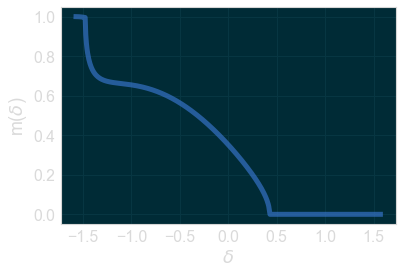

In [3]:
# detector stuff
auger_coords = [-35.5, -69.3] # lat, lon in degrees
threshold_zenith_angle = 60 # degrees
data.add_detector(auger_coords, threshold_zenith_angle, label = 'Auger')

# plot the exposure (this can take ~15 s to run...)
data.detector['Auger'].show(view = 'decplot', cmap = 'vaporwave')

In [12]:
# integral stuff
import numpy as np
kappa = np.linspace(10, 1000, 10)
#kappa = 100
params = data.detector['Auger'].params
filename = 'test.data.R'
#filename = 'test_sim.data.R'
mytable = ExposureIntegralTable(kappa, varpi, params, filename)

In [13]:
mytable.build()

10.0 1.1843880163034637 2.0962772902949345e-08
10.0 0.9765912065866652 1.4292645341277655e-08
10.0 0.38794708375327525 1.4698241777107748e-08
10.0 0.6035770798933026 1.4890565942995038e-08
10.0 1.0956057649313349 1.4512463891189728e-08
10.0 1.0491481592913545 1.3284969607577947e-08
10.0 1.0072188201396428 1.4822297090503079e-08
10.0 0.3981388345364208 1.4622122635962742e-08
10.0 0.38881125167787955 1.3713686039793008e-08
10.0 0.05537663135867346 1.3423826326344075e-08
10.0 1.1246645460783 1.4834269618235751e-08
10.0 0.10575002596253955 1.4501182264920014e-08
10.0 1.0849964570644182 1.4867675196100208e-08
10.0 0.043540378213146026 1.4705656918965337e-08
10.0 0.0432558890657271 1.4479427243304332e-08
10.0 1.0925819274902668 1.7151154253783004e-08
10.0 1.1907729706171275 2.040953749060659e-08

120.0 1.2017765399688976 5.278114549869684e-08
120.0 1.0310267447533157 1.2911039515900913e-08
120.0 0.37362473196922324 1.4890966852311769e-08
120.0 0.6387211476316477 1.2814201921784729e-08
120.0 

In [11]:
import pystan
hey = pystan.read_rdump(filename)
hey['table'][0][1]

1.0300113027976376